<a href="https://colab.research.google.com/github/F7Villani/ECA-817-Fund-ML/blob/main/%5BECA817%5DAula_03_Regress%C3%A3o_Linear_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [71]:
df_co2 = pd.read_csv("/content/FuelConsumptionCo2.csv")
df_co2.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [72]:
df_co2.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


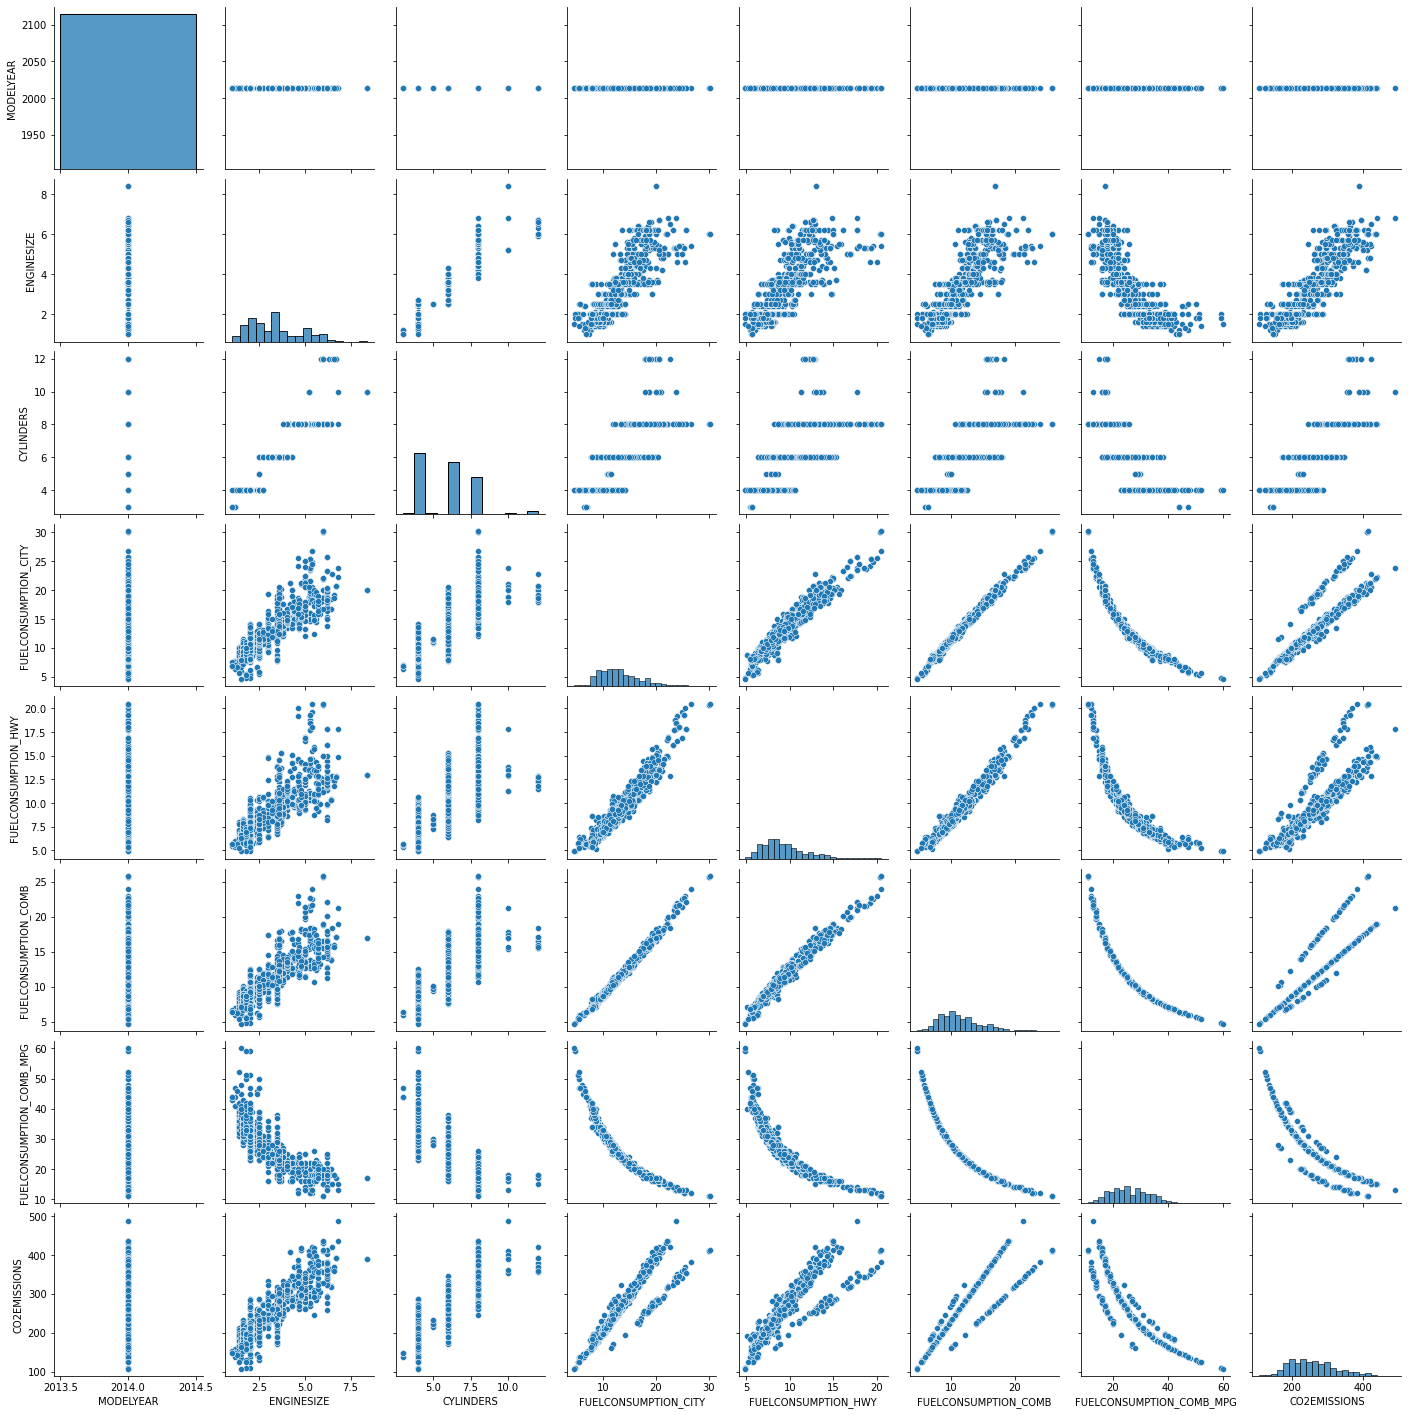

In [73]:
sns.pairplot(df_co2)

In [74]:
df_co2.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [75]:
X = df_co2[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [76]:
y = df_co2["CO2EMISSIONS"]
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [78]:
X_train.shape

(714, 3)

In [79]:
X_test.shape

(353, 3)

In [80]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
model.coef_

array([10.84577056,  7.88844096,  9.63325412])

In [82]:
model.intercept_

64.27611718790845

In [83]:
model.score(X_test, y_test)

0.8411827105923215

In [55]:
model.predict([[2, 4, 10]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([213.85396334])

# Daqui pra frente é outra parada

In [58]:
adv = pd.read_csv('/content/advertising.csv')
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


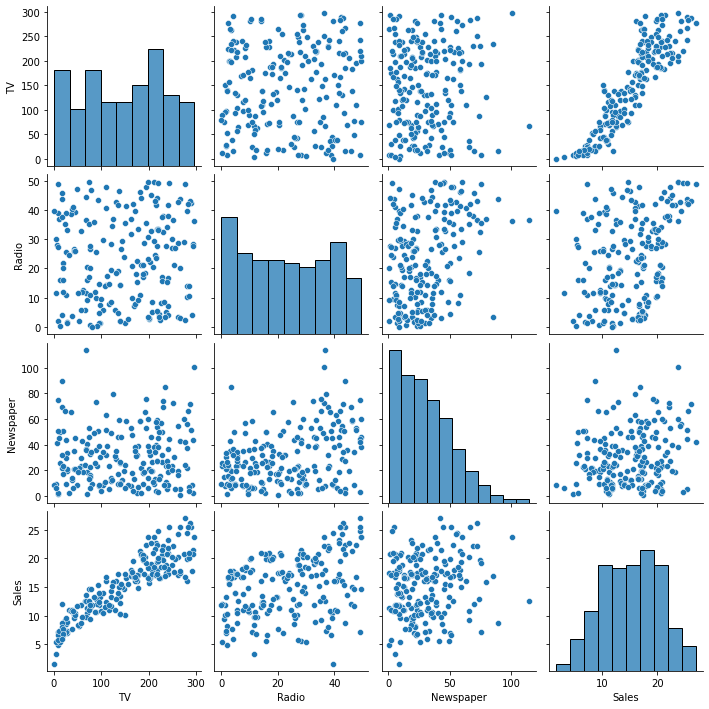

In [60]:
sns.pairplot(adv)

In [102]:
features = ['TV', 'Radio', 'Newspaper']

for feature in features:
  X = adv[[feature]]
  y = adv[['Sales']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_simple = linear_model.LinearRegression()
  model_simple.fit(X_train, y_train)
  score = model_simple.score(X_test, y_test)
  print(f'{feature}: {score:.2%}')

TV: 80.26%
Radio: 10.70%
Newspaper: 0.46%


In [103]:
X = adv[['TV', 'Radio', 'Newspaper']]
y = adv[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_simple = linear_model.LinearRegression()
model_simple.fit(X_train, y_train)
score = model_simple.score(X_test, y_test)
print(f'Multiplo: {score:.2%}')

Multiplo: 90.59%
